**Lecture link** :  https://www.scaler.com/meetings/i/dsml-advanced-bagging-and-boosting-usecase-2/archive

## Content

1. Business problem -BaseCode (04:20 - 52:03)
2. Decision tree implementation (52:10 - 1:18:25)
3. Random forest implementation (1:18:25 - 1:29:00)
4. Boosting (1:47:30 - 2:22:40)

## Business problem  - code

Here, our motive of this case is to understand if an employee would attrit from the data given,which is very important for HR's.

Let's get started



In [ ]:
# HR/People Analytics
import numpy as np
import pandas as pd
import io

We just imported the librbaries required for the code

Now let's download the data set.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk" -O HR-Employee-Attrition.csv

--2022-06-27 04:25:17--  https://drive.google.com/uc?export=download&id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
Resolving drive.google.com (drive.google.com)... 74.125.31.101, 74.125.31.139, 74.125.31.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3u1lvannr4gf1kqt013hfffac1k6nnjj/1656303900000/05948409478210288909/*/16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk?e=download [following]
--2022-06-27 04:25:17--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3u1lvannr4gf1kqt013hfffac1k6nnjj/1656303900000/05948409478210288909/*/16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk?e=download
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-64-docs.googleusercontent.com (doc-08-64-docs.go

we will just have a quick look at the data set to see the features involved.

In [ ]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


we can see many features in the data set and we can see that education is encded as numericals basing on the standards of education.
* But id doesn't matter as we use these as threshold in the Decision tree
* This encoding may have imoact in Logistic and linear Regression as distance is calculated there it matters there.



<img src='https://drive.google.com/uc?id=1vlpWkL84wpDnbWwONlpNJqQrRY5HqhCQ' >



<img src='https://drive.google.com/uc?id=1hI9lcuneS7HVj0wPRgrIMCck9cv7ujUV' >

**Will this encoding done in random matters?**

* Yes, it matters when the encoding is random because the education level is ordinal.

* If we mess up with these levels in random way, we end up grouping in manner which doesn't make any sense.

* Let us consider
 * school level - 1
 * undergraduate - 2
 * Maters - 3 and
 * PhD - 4

These education levels are orinal so this make sense

* if we mess up this order and assign
 * school level - 4
 * undergraduate - 2
 * Maters - 3 and
 * PhD - 1

If now, we consider threshold 2,
we end up grouping school level and PhD in one group which doesn't make any sense.


<img src='https://drive.google.com/uc?id=1Rrt4FLCV3t5hbuFGgowYTJnaVLcvykZB' >



**What type of encoding can we do in Logistic regression?**

We can do one-hot encoding or target encoding as the scale sets the order.


We will haave look at the columns in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The Business problem that we want to see is to....

In [ ]:
# Business problems
# 1.Find employees who are at high risk of attrition and  take remedial steps [ML Model]
# 2. Identify factors leading to attrition [Feature importance]

Let's get into some data processing,

First let's see the value count of the Attrition.


In [ ]:
# Data preprocessing

# y_i's as 1 and 0 instead of Yes and No
df['Attrition'].value_counts()
# imbalanced data (~1:6 ratio): Need to account for this while building ML models

No     1233
Yes     237
Name: Attrition, dtype: int64

* We can  see the number of yes and no's  in the data and it's clearly an imbalance data, which is in 1:6  ratio which we can balance by using techniques like class weights, SMOTE.




In [ ]:
df.loc[df['Attrition']=='Yes', 'Attrition'] = 1
df.loc[df['Attrition']=='No', 'Attrition'] = 0

* In the above code we are replacing the locations in df, 1 where Attrition is yes and 0 where attrition is no.

We will verify the Attrition values just to be sure.

In [ ]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

* But there are few drawbacks with SKlear implementation of a Decision tree like
 * SKlearn cannot handle categorical features natively, which means it doesn't split basing on the category. SKlearn takes numerical features only.



<img src='https://drive.google.com/uc?id=1ceAWCsgy-UKOdYmvgYwndWj82CdhRR9f' >

**How can we encode categorical features in Decision tree?**
* one-hot encoding (we should avoid if we have categorical features with many features )
* Target encoding



<img src='https://drive.google.com/uc?id=1IEaM5FpvtyvOKQkWxpPbUMYKWPvwJ_Z1' >



* **Label encoding should not be used** as it creates a random order of labels which results in random splits
* Label encoding can be done when there are only two categories.



<img src='https://drive.google.com/uc?id=1DVuG39_CsX-WLdMLR6E5jz49kZsxijyY' >



Now let's continue with target encoding,

In [ ]:
# Sklearn DT doesnot handle categorical values natively.
# Options: OHE or Target Encoding (our choice)
# Converting all non numerical features into Target encoded features


# **Q**: Why not Label Encoding in Sklearn?

In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


we installed category-encoders module which helps us to encode categorical values

Let's see if there are any non-numerical features in the data set

Now, we should convert these non numerical to numerical values

In [ ]:
from pandas.api.types import is_numeric_dtype
from category_encoders import TargetEncoder

# Convert all non-numeric features into Target-encoded features
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
  if is_numeric_dtype(df[col])== False:
    encoder = TargetEncoder()
    df[col] = encoder.fit_transform(df[col], df['Attrition'])


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


* is_numeric_dtype function helps us to know if a column is numerical or not and
* We use TargetEncoder to convert the non-numerical features to numerical features


* We have selected all the columns and removed the Attrition column then verified the columns if they are non-numerical

* Which ever column  having the is_numeric_dtype as false, it's value should be replaced by numerical values using encoder which is done in above code
* and we should the training data set as the $x$ and Attrition column as the $y_i$


<img src='https://drive.google.com/uc?id=1QbNheArxpFXfVBPX7aV2riKgBlBkjLLR' >



* Before encoding we have to split the data into train, test, cross validation data sets and do target encoding on the train data set to avoid **data-leakage**.



<img src='https://drive.google.com/uc?id=1-iI_vu59mhGL2wI4fFTUi_BX0WlnBHWe' >



**What is the difference between fit and fit_transform?**

* **fit** only fits the encoders, which means learning the target encoders with the data given.
* **fit_transform** learns and also replaces the categorical features with numerical values from encoders.
* **transform** is used with cross validation and test data set sets which because they need not fit the data but should be trnasformed as train   data set is fit.


<img src='https://drive.google.com/uc?id=11bqYN0D_J07WuTxBFoKO6pEgm_qusmEg' >

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.149569,1102,0.206278,1,2,0.146865,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,0.249097,279,0.138398,8,1,0.146865,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0.149569,1373,0.138398,2,2,0.134146,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,0.249097,1392,0.138398,3,4,0.146865,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0.149569,591,0.138398,2,1,0.135776,1,7,...,4,80,1,6,3,3,2,2,2,2


So, from the data set, we can see that there are few columns which are useless and we should remove those.

In [ ]:
# Remove useless columns
df['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

* EmployeeNumber is unique for all values, this is like an indentity which has no information which is useful. So, it can be removed

In [ ]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

* Also the column EmployeeCount is 1 for all the rows, so this also can be ignored.


In [ ]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

* Same with the StandarsHours also it's 80 for all employees and also over18


In [ ]:
df['Over18'].value_counts()

0.161224    1470
Name: Over18, dtype: int64

Now, let's assign the values for $y$ and $x$

In [ ]:
y = df['Attrition']
y = y.astype('int')

*  Here Attrition column is the $y$ and we forced and converted $y$ to integer type as we were using 0,1 for Attrition column.

* Now, let's drop all the useless columns which we saw earlier and assign the remaining columns as $x   $

In [ ]:
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

X = df

Size of Full dataset is: (1470, 30)


Now, let's divide our dataset in **60:20:20** ratio for train, test, cross validation data sets, as we have seen earlier.

In [ ]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

Now, lets how the data is devided to each dataset as mentioned above

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_CV dataset: ", X_val.shape)
print("Number transactions y_CV dataset: ", y_val.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (882, 30)
Number transactions y_train dataset:  (882,)
Number transactions X_CV dataset:  (294, 30)
Number transactions y_CV dataset:  (294,)
Number transactions X_test dataset:  (294, 30)
Number transactions y_test dataset:  (294,)


Now, we have our basic set-up ready

Let's see the codes for Decision Tree and Random Forest.

## Decisiom Tree implementation

* Here our main agenda is to train a decision tree model and do some hyper-paramter tuning

* In this case our **hyper-parameter** is **Depth**

Let's get started with the code.

In [ ]:
# Hyper-pram tuning + DT model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


From the above code we are importing the required libraries

In [ ]:
train_scores = []
val_scores = []

Creating two lists of train_scores and val_scores to compare the results.

In [ ]:
l=1
u=20
d=1
w=1.0

for depth in np.arange(l,u,d):
  clf = DecisionTreeClassifier(random_state=0, max_depth=depth, class_weight={ 0:0.1, 1:w } )
  clf.fit(X_train, y_train)
  train_y_pred = clf.predict(X_train)
  val_y_pred = clf.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

* Here at first we are declaring the values of l,u and d which are like lower boundary, uppper boundary and the difference in the values is 1.
* After that, we created a classifier DecisionTreeClassifier
and the parameter to control is depth, so we are giving the maximum value of depth which the model can be reached
* We can even add another hyper parameter class weight where we mentioned that the class weight of label 0 is 0.1 and with label is 1 is w, which shows that our data is clearly imbalanced with 1:10 ratio.


**What happens if with both depth and weights are considered as hyper-parameters?**
* It becomes complex, as you can set depth for every weights ratio possible due to which you will get many possible models.
* We can automate this process of combining the hyperparameters using **Grid and Random search** which will de discussed in the further lectures.


<img src='https://drive.google.com/uc?id=1L8LRlDnt7qSoGCwCZGJRFbP8u5jGqrKn' >

       clf.fit(X_train, y_train)
       train_y_pred = clf.predict(X_train)

* In the above part of the code we are fitting the training data set and predicting the $y$ for the same

     val_y_pred = clf.predict(X_val)
     train_score = f1_score(y_train, train_y_pred)
     val_score = f1_score(y_val, val_y_pred)
     train_scores.append(train_score)
     val_scores.append(val_score)

* In the next part we are predeicting the $y$ values for validation set and getting the f1 score of both the datasets and appending the same in the list

Now, let's plot the graph for the output

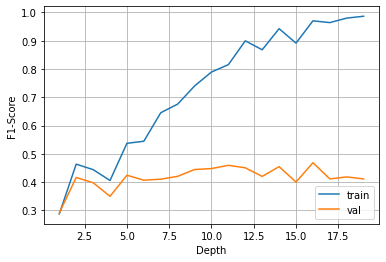

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("Depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

* From the graph we can see that
 * When the depth is low we are underfitting
 * When the depth is high we are overfitting the data  that is why we are getting f1_score
* You can check the distnace between both the plots and choose the point where the validation score is high and close to the train value
* So we take 2 or 5 but not 16 because the model is overfitting.






<img src='https://drive.google.com/uc?id=158JC7CQEaEcV5ZibbkVTaD8-hT12mu3J' >


**But is depth 2 okay for 30 features?**
* Yes, it can be as the problem might be too hard and the model might capturing more values at depth=2.


<img src='https://drive.google.com/uc?id=1aNzspi6BvzHpl7VEii2gDg1FOeG9eETP' >

Let's. look at the confusion matrix at the best depth.

In [ ]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = 2 #l+d*best_idx
print(l_best)
clf = DecisionTreeClassifier(random_state=0, max_depth=l_best, class_weight={ 0:0.1, 1:w } )
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(val_score)

confusion_matrix(y_val, y_pred_val)

2
0.41618497109826585


array([[157,  87],
       [ 14,  36]])

* From the confusion matrix we can see that we have only predicted 36 people correctly and missed 14 people who are going to leave and also we have prdicted 87 wrong people.



### Feature Importance

Now let's add the feature importances to the classifier
* This computes the feature importance which is actually computed on basis of weighted information gain.

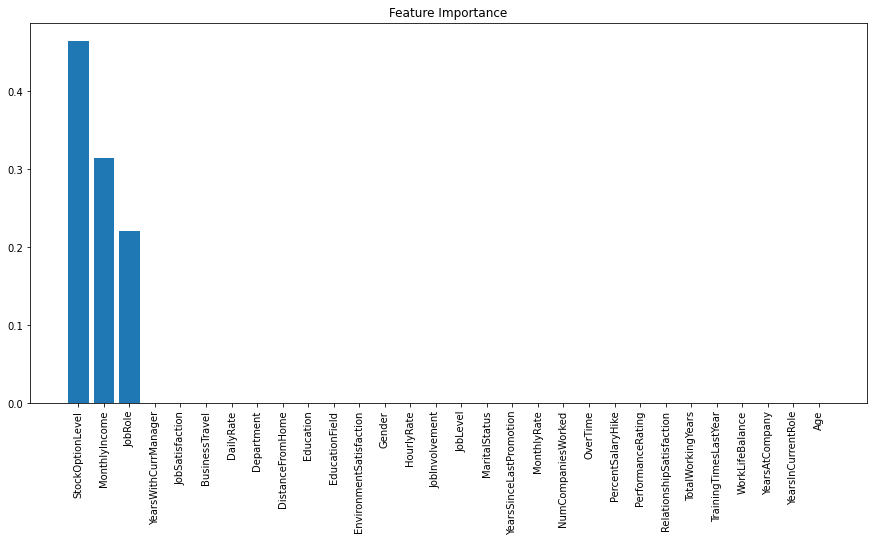

In [ ]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

    importances = clf.feature_importances
    indices = np.argsort(importances)[::-1]
    names = [X_train.columns[i] for i in indices]



* Here in this code we calculate the feature importance of features and sorting them, and finding the names of the columns in the data set with high feature inportance

* And then we plot the same




From the graph it's clear, which features have the most importance

## Random Forest implementation

Now, let's see the code implementation of the random forest



In [ ]:
# Hyper-pram tuning + DT model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=3.0
num_learners=100
row_sampling_rate = 0.75


for depth in np.arange(l,u,d):
  clf = RandomForestClassifier(max_depth=depth, max_samples=row_sampling_rate, n_estimators=num_learners, random_state=0, class_weight={ 0:0.1, 1:w } )
  clf.fit(X_train, y_train)
  train_y_pred = clf.predict(X_train)
  val_y_pred = clf.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

* The code for Random forest is smilar to Decision tree with few changes

    
    num_learners=100
    row_sampling_rate = 0.75

* These are the new hyperoarameters which can be used
 * we are setting the number of base learners
 * and also the percentage of  rows to be sampled





We will plot the same

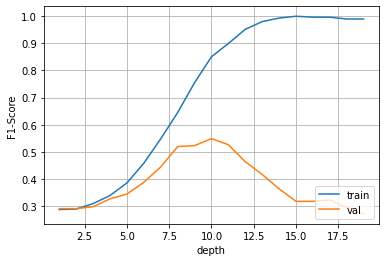

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

* When we increase the depth we have to decrease the sampling $\frac{m}{n}$ and also increase the number of base learners to control overfitting
* But here we are only increasing the depth due to which the model is overfitting more and more, Hence the f1 score decresed significantly
* Here we choose 8 over 10 because the model become more complex



<img src='https://drive.google.com/uc?id=10orqUbinB45d45B_UY6MWUSOeWEsHn-z' >

<img src='https://drive.google.com/uc?id=1wwsDSifJ59ZdgO4wEOw_b80z8Brlte5I' >



Now let's use 8 as the best depth and see the confusion matrix for the same, just like we did for Decision tree

In [ ]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = 8 #l+d*best_idx
clf = RandomForestClassifier(max_depth=l_best, max_samples = row_sampling_rate, n_estimators=num_learners, random_state=0, class_weight={ 0:0.1, 1:w } )
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(val_score)

confusion_matrix(y_val, y_pred_val)

We can clearly see the model improved slightly

### Feature Importance

Now, let's compute the feature importances for the Random forest

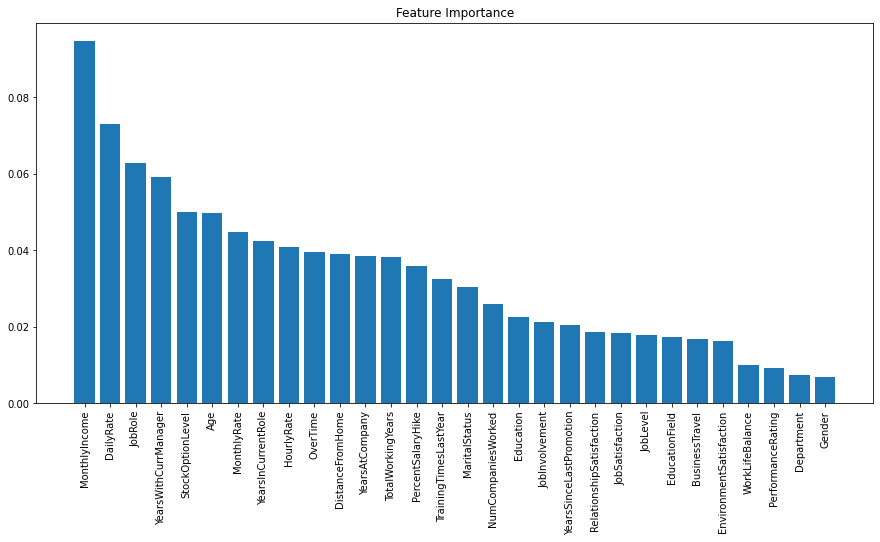

In [ ]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

* In this plot, we can see significant change when comapred to the Decision tree
* This is because we made the model little complex due to which it is able to capture more information from the dataset.

**How does Feature importance in a Random Forest work?**

* A simple way of finding the feature importance in Random Forest is by computing the feature importance of a feature in each Decision Tree and take the average of these values.

**What if some base learners don't have the feature?**

* The importance of that feature will be considered 0, in that Base learner
* Even if we take average of trees in which the feature is not present, it do not effect much because all the features have equal importance of being chosen.
* Let's assume there are 100 tress and column sampling rate is 0.1 , so a feature $f_{10}$  will approximately be in 10 base learners same happens with all other features also.
* So deviding by 10 or 100 doesn't matter  


<img src='https://drive.google.com/uc?id=1LVomOHNxqGG-_VUpvI7ApjaRW5ZEkWN_' >


**QUESTION :**

**Let's assume we have a categorical feature having values A,B,C,D,E and on splitting the data A,B,C,D were split to train data set and E is in test data set, what happens when we transform this value?**

* When we have such a condition the E is given the value of average of probability of $y_i=1$ which is **global average**, and this process is called **Global smoothing.**


<img src='https://drive.google.com/uc?id=1oVfqjwdwntgIOkqD1NGelKuIU4gmM4Mk' >


## Boosting

Let's see **what is Boosting and why is it needed**.


For this we will recap the **Bagging** and contrast the both

 * In Bagging we had base learners which are typically of **high varaince and low bias with deep trees**
 *  Then we added **randomization like row sampling, column sampling** and also randomisation of threshold in Extra trees
 * At last we did **aggregation** of the outputs of the base learners

In boosting we do something which is exactly opposite of the Bagging technique
* In boosting  we have base learners which are typically of **low varaince and high bias with shallow trees**
 * Mostly uses Decision stumps (trees with depth=2)
* And we do **Additive Combination**
  * In Which we combine these shallow trees to make the model complex
  

The library **XgBoost** combines both Bagging and Boosting to give us the best model

<img src='https://drive.google.com/uc?id=14gNWmCcUndoXbWiPWEnzCR4y2zH8MItq' >


* We already saw that error is a function of bias, variance, and some irreducable error
  * **Error = Bias$^2$ + Varaince + irreducable error**
* The base learners in Boosting have high bias and low variance, Here the idea is to **decrease the bias using Additive Combination**
* Staticians have proved that through Addtitve combuination we can **reduce bias keeping our variance almost constant**





<img src='https://drive.google.com/uc?id=1NseAUG7vJIWqm2FIdjuzsMmMyi-lQVOG' >

### Core idea of Boosting

Let's assume  we have our train data set $D_{tr}$ of $n$ points ${(x_i,y_i)}_{i=1}^n$

And let's do this for Regression

Now let's build our models in stages

**stage 0: $M_0$**

As we are bulding a Regression model the simplest Regression model is to assign the $ŷ_i$  with the mean of all $y_i$

* Our model $h_0(x)$ is a simple **Mean model**
* Now let's find the $error_i^0$ of the values by calculating error as
 * $error_i^0$ = $y_i - ŷ_i^0$

**Stage 1 $M_1$:**

In stage 1  we extend the model
* We will build a shallow Decision Tree (Worst case is Decision Stumps)
* This model is trained on $x_i$ and $error_i^0$
* so, the present model $h_1(x)$, is training on the errors of the previous model
* Now, we want to combine the first and second model

**How can this be done?**

We can do this by summation, but instead of doing simple summation we do weighted summation of the models

* So, $F_1(x) = α_0 h_0(x) + α_1 h_1 (x)$

* We can find $α_0, α_1$ using some optimization algorithm

Now let's find the error of this model by
 * $error_i^1$ = $y_i -F_1(x_i) $



**Stage 2 $M_2$:**

In stage 2, we again train a shallow Decision tree on ($x_i, error_i^1$) let this model be $h_2(x_)$

* Now my final model after satge 2 becomes
 *  $F_2(x) = α_0 h_0(x) + α_1 h_1 (x) + α_2 h_2(x)$
 * Here now we only have to find $α_2$ as other values are known

Suppose if i keep building the models in this way
* After $M$ Stages the final model after $M$ Stages will be  
 * $F_M(x) = ∑_{i=0}^M α_i h_i(x)$
 * Here the $h (x)$ is either a very simple mean model or a shallow tree which are underfit and wights ($α$'s) are calculated by an optimization algorithm

* Simply,  here we are iteratively building our models on the error of the previous models

<img src='https://drive.google.com/uc?id=1rvJ2pqaOZjJDNQUbSt0OiwhfN9Y5f4D-' >


<img src='https://drive.google.com/uc?id=1xWjqkV2X0qbHXEECb93D8dfk5AXLzMNo' >


<img src='https://drive.google.com/uc?id=1jD-QlZ8L50TRc04A6cWe5Z7UrmEyFOnb' >




<img src='https://drive.google.com/uc?id=1rlMfGsvfuoubi53Iyp74tNvRC5d_q6dM' >


* Now, our model is $F_M(x) = ∑_{i=0}^M α_i h_i(x)$

* Recalling linear Regression model where
 * $F_x= ∑_{i=1}^d w_ix_i + w_0$

* So, by comparing both we can say in $F_x$ simple models $h(x)$ are behaving like the features in linear regression and $α$ is behaving like the weights

* In Boosting we build a bunch of simple models and do a sought of weighted additive model which as same as linear regression model


* The errors after each stage $j$ ($error_i^j$) are called **residuals**



<img src='https://drive.google.com/uc?id=1zrUm835nrv9HtetiMErcszubmP4I9-Vi' >


<img src='https://drive.google.com/uc?id=1RIrx_gijux_taDcyJQwfLDbOesvzUoY5' >



* All the Boosting techniques like XgBoost, AdaBoost and any other boosting techniques are **simple variations or optimizations of the framework** that we saw.

## Mathematical Interpretation

So, to understand GBDT there are few concepts to be known.
* Residuals
* Loss-function
* Gradients
* Pseudo-Residuals

let's see what they are

* Let us assume we have the model $F_K(x) = ∑_{i=0}^K α_i h_i(x)$ after $K$ iterations on the train dataset  $D_{tr}$ of $n$ points ${(x_i,y_i)}_{i=1}^n$
* In machine learning every algorithm have a loss function    
  * In linear regression we have squared loss, for logistic we have log-loss and svm have hinge loss
 * But in GBDT we can have **any differentiable loss function**



<img src='https://drive.google.com/uc?id=1ojL0juSKWwU0dneF94XPZtVujiMC04FY' >

 Let's use squared loss as the example

let's assume we have a loss function of $L(y_i,F_k(x))$,
Here $F_k(x)$ is the output of the model
 * Loss for one point is $(y_i - F_k(x_i))^2$
 * Like in Gradient descent  lets differentiate the loss function with the output of the model, which gives
  * $\frac{d(L)}{d(F_k(x_i))} = (-1)*2* (y_i - F_k(x_i)) = -2 (y_i - F_k(x_i)) $
   * if we multiply with -1 on both sides we get
     * $-\frac{d(L)}{d(F_k(x_i))} = 2 (y_i - F_k(x_i)) $
     * Where (y_i - F_k(x_i)) is residual which is error after k models $res_{i,k}$

* So, we can say that
 * residual = negative of the gradient of loss function with respect to output of the model


<img src='https://drive.google.com/uc?id=1pCLakOLn0_PC11ssdalknOIbq1X2Kw35' >

<img src='https://drive.google.com/uc?id=15Bf1gtihAbBAgkmIvqM0szgczaJ8nxDa' >


Similarly in logistic regression
 we can prove that
  * Negative gradient = $\frac{d(L)}{d(F_k(x_i))} = y_i - p_i $

<img src='https://drive.google.com/uc?id=1CtbCLD4cZ74Y_4Ekx3A2bHJgNme62S2f' >



Hence for any differentiable loss function $L$, it can be proved that
*  $\frac{d(L)}{d(F_k(x_i))}$ = residual$_{i,k}$ which is nothing but the error, which can be used to train the further models.

<img src='https://drive.google.com/uc?id=1SdSNjfN41XM819fi98ZbQVcpbRHP88EI' >



We can clearly say that we can train the $k+1^{th}$ model on the residual of $k^{th}$
* But we are using the derivative of loss function which is pseudo residual,
* So, training the model on residual or psuedo residual is same

<img src='https://drive.google.com/uc?id=1ErYPgWnWnEhbiB81bJKDG-0-TV7M8GVP' >



So, in boosting if we are using the negative gradient as pseudo residual instead of using residual or error, this model is called as GBDT i.e Gradient Boosted Decision Tree

**Why are we using GBDT or psuedo residuals instead of error/ residual?**

* Because it gives us the **flexibility** to use any differentiable loss function of our choice.




<img src='https://drive.google.com/uc?id=1H7V4wOMUtVv1OqWSbeu8_gh3QMjLwMo0' >
